<a href="https://colab.research.google.com/github/LuvMutreja/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/Unsupervised_ML_Project_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - NETFLIX MOVIES AND TV SHOWS CLUSTERING



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual - Luv Mutreja


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

[GitHub Repository Link](https://)

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1595]:
# Importing Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime
from datetime import date
from wordcloud import WordCloud, STOPWORDS
plt.rcParams['figure.figsize'] = (10,6)

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [1596]:
# Mounting the drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1597]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Alma Better/Module 4 Machine Learning/#Capstone Projects/Unsupervised Capstone Project- NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [1598]:
# dataset = pd.read_csv('G:/My Drive/Alma Better/Module 4 Machine Learning/#Capstone Projects/Unsupervised Capstone Project- NETFLIX MOVIES AND TV SHOWS CLUSTERING/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [1599]:
# Dataset First Look
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [1600]:
# Dataset Rows & Columns count
dataset.shape

(7787, 12)

### Dataset Information

In [1601]:
# Dataset's Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [1602]:
# Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [1603]:
# Missing Values/Null Values Count
print(dataset.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [1604]:
# printing the total null values in the dataset
print('Total null values present in this dataset are :',dataset.isnull().sum().sum())

Total null values present in this dataset are : 3631


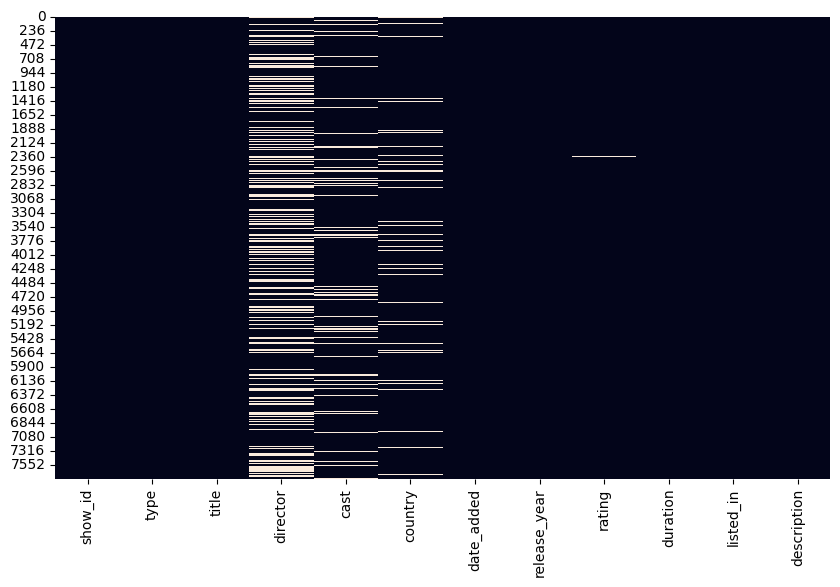

In [1605]:
# visualizing Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)
plt.show()

### What did you learn about your dataset?

## ***2. Understanding Your Variables***

In [1606]:
# Dataset's Columns
dataset.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [1607]:
# Describing the Dataset 
dataset.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description 

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genre

description: The Summary description

### Check Unique Values for each variable.

In [1608]:
# Number of Unique Values in each variable.
for col in dataset.columns:
  print('Number of unique values in ',col,' is ',dataset[col].nunique())

Number of unique values in  show_id  is  7787
Number of unique values in  type  is  2
Number of unique values in  title  is  7787
Number of unique values in  director  is  4049
Number of unique values in  cast  is  6831
Number of unique values in  country  is  681
Number of unique values in  date_added  is  1565
Number of unique values in  release_year  is  73
Number of unique values in  rating  is  14
Number of unique values in  duration  is  216
Number of unique values in  listed_in  is  492
Number of unique values in  description  is  7769


## 3. ***Handling Missing Values and Data Wrangling***

In [1609]:
# Handling Missing Values & Missing Value Imputation
for col in dataset.columns[dataset.isnull().any()].tolist():
    print(col,'has',(dataset[col].isnull().sum()/dataset.shape[0])*100,'% null values' )

director has 30.679337357133683 % null values
cast has 9.220495697958135 % null values
country has 6.51085141903172 % null values
date_added has 0.1284191601386927 % null values
rating has 0.08989341209708489 % null values


In [1610]:
for col in dataset.columns[dataset.isnull().any()].tolist():
    if col not in 'date_added':
        dataset[col].fillna('unknown',inplace=True)

In [1611]:
def making_df_from_column(col,column_names):
    lis=[]
    for row in range(dataset.shape[0]):
        if ',' in dataset[col][row]: 
            for item in dataset[col][row].split(','):
                lis.append(item)
        else:
            lis.append(dataset[col][row])        
    dictionary={}
    for item in set(lis):
        dictionary.update({item : lis.count(item)})
    df=pd.DataFrame(dictionary.items(),columns=column_names)
    return df 

In [1612]:
actors_df=making_df_from_column('cast',['actors','appeared_in'])
actors_df

,actors,appeared_in
0,Kazuyuki Okitsu,7
1,Gallen Lo,1
2,Tina Pica,2
3,Jermaine 'Huggy' Hopkins,1
4,Georgia Somary,1
...,...,...
35368,Ayesha Singh,1
35369,Numan Acar,1
35370,Angela Mulligan,1
35371,Joko Anwar,2


In [1613]:
genre_df=making_df_from_column('listed_in',['genre','count'])
genre_df

,genre,count
0,Anime Series,148
1,Korean TV Shows,150
2,Stand-Up Comedy & Talk Shows,33
3,Stand-Up Comedy,8
4,Spanish-Language TV Shows,145
...,...,...
68,Docuseries,194
69,Classic & Cult TV,21
70,Children & Family Movies,502
71,Sports Movies,1


In [1614]:
dataset.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [1615]:
dataset.dropna(inplace=True)

In [1616]:
dataset.isnull().sum().sum()

0

In [1617]:
movies=dataset[dataset['type']=='Movie']

In [1618]:
movies['duration']=movies['duration'].apply(lambda x: int(x.split()[0]))

In [1619]:
dataset['country']

0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                              unknown
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, Length: 7777, dtype: object

In [1620]:
dataset['country']=dataset['country'].apply(lambda x : x.split(',')[0])

In [1621]:
dataset['country']

0               Brazil
1               Mexico
2            Singapore
3        United States
4        United States
             ...      
7782            Sweden
7783             India
7784           unknown
7785         Australia
7786    United Kingdom
Name: country, Length: 7777, dtype: object

In [1622]:
# Creating a function to convert date's value's datatype from string to a string that can be converted to datetime datatype
def date_to_str(s):
  s=s.split()
  if s[1][0]==' ':
    s1='0'+s[1][1]+'.'
  else:
    s1=s[1][:-1]+'.'  
  if 'Jan'in s[0][:3]:
    s1=s1+'01'
  elif 'Feb'in s[0][:3]:
    s1=s1+'02'
  elif 'Mar'in s[0][:3]:
    s1=s1+'03'
  elif 'Apr'in s[0][:3]:
    s1=s1+'04'
  elif 'May'in s[0][:3]:
    s1=s1+'05'
  elif 'Jun'in s[0][:3]:
    s1=s1+'06'
  elif 'Jul'in s[0][:3]:
    s1=s1+'07'
  elif 'Aug'in s[0][:3]:
    s1=s1+'08'
  elif 'Sep'in s[0][:3]:
    s1=s1+'09'
  elif 'Oct'in s[0][:3]:
    s1=s1+'10'
  elif 'Nov'in s[0][:3]:
    s1=s1+'11'
  elif 'Dec'in s[0][:3]:
    s1=s1+'12'    
  s1=s1+'.'
  s1=s1+s[2][-2:]
  return s1                   

In [1623]:
dataset['date_added']=dataset.apply(lambda x:date_to_str(x['date_added']),axis=1)

In [1624]:
dataset['date_added']=dataset['date_added'].apply(lambda x:datetime.strptime(x,'%d.%m.%y'))

In [1625]:
dataset

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...",Sweden,2020-10-19,2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,unknown,Nasty C,unknown,2020-09-25,2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,unknown,"Adriano Zumbo, Rachel Khoo",Australia,2020-10-31,2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [1626]:
dataset['year_added']=dataset['date_added'].apply(lambda x : x.year)

In [1627]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7777 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7777 non-null   object        
 1   type          7777 non-null   object        
 2   title         7777 non-null   object        
 3   director      7777 non-null   object        
 4   cast          7777 non-null   object        
 5   country       7777 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7777 non-null   int64         
 8   rating        7777 non-null   object        
 9   duration      7777 non-null   object        
 10  listed_in     7777 non-null   object        
 11  description   7777 non-null   object        
 12  year_added    7777 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 850.6+ KB


In [1628]:
dataset['latest']=np.where(dataset['year_added']==dataset['release_year'],1,0)

In [1629]:
rating_dict={'rating':{'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'}}
dataset=dataset.replace(rating_dict)

In [1630]:
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,latest
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,Adults,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,Adults,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,Adults,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,Teens,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,Teens,123 min,Dramas,A brilliant group of students become card-coun...,2020,0


#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### What all manipulations have you done and insights you found?

Answer Here.

## ***5. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1. Show Type value counts

In [1631]:
# visualization code
px.pie(names=np.sort(dataset['type'].unique()),values=dataset['type'].value_counts(),template='plotly_dark',hole=0.8,width=450,height=400,color_discrete_sequence=['#FFFF00', '#Ff0000']).update_traces(hovertemplate=None,textinfo='percent + value + label',showlegend=False).update_layout(title_text='Number of TV Shows and Movies',title_x=0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 2

In [1632]:
# visualization code
px.histogram(dataset,x='release_year',color_discrete_sequence=['#Ff0000'],template='plotly_dark').update_layout(title_text='Shows released year wise',title_x=0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 3

In [1633]:
# visualization code
px.histogram(dataset,x='release_year',color='type',color_discrete_sequence=['#Ff0000','#0000ff'],barmode='group',template='plotly_dark').update_layout(title_text='TV shows and Movies released year wise',title_x=0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 4. Actors with most Movies

In [1634]:
# visualization code
px.bar(actors_df.sort_values(by='appeared_in',ascending=False)[1:20],x='actors',y='appeared_in',template='plotly_dark',color_discrete_sequence=['#800020']).update_layout(title_text='Top 20 Actors with most movies',title_x=0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 5. Top 10 Directors

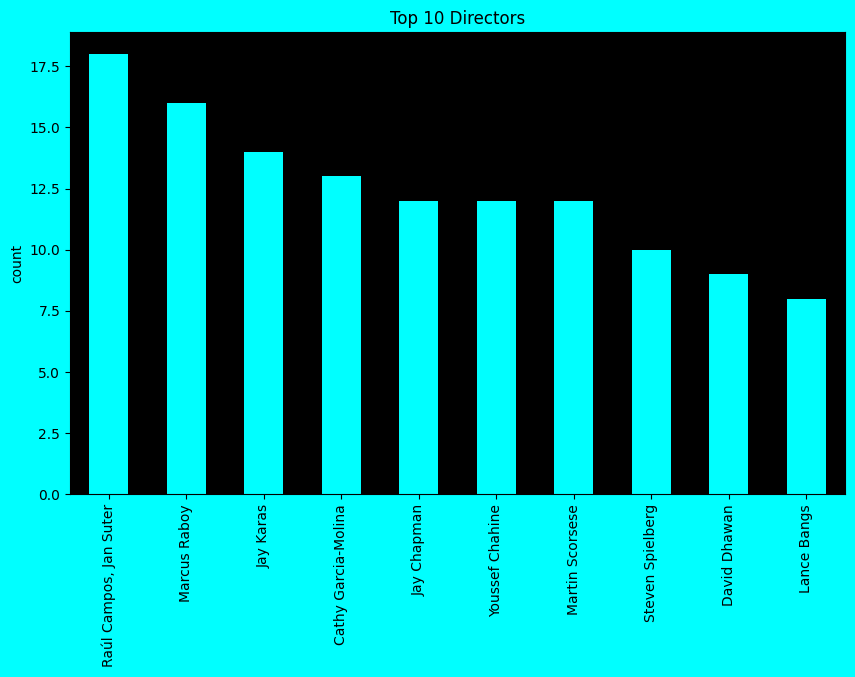

In [1635]:
# visualization code
plt.figure(facecolor='#00FFFF')
plt.axes().set_facecolor("black")
dataset['director'].value_counts()[1:11].plot(kind='bar',color='#00FFFF')
plt.title('Top 10 Directors')
plt.ylabel('count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 6. Number of Movies and Tv Shows for different show Ratings

In [1636]:
# visualization code
px.histogram(dataset,x='rating',color='type',barmode='group',template='plotly_dark',color_discrete_sequence=['#FF69B4','#7F00FF']).update_layout(title_text='What Rated shows are maximum in number',title_x=0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 7. Countries producing the maximum content

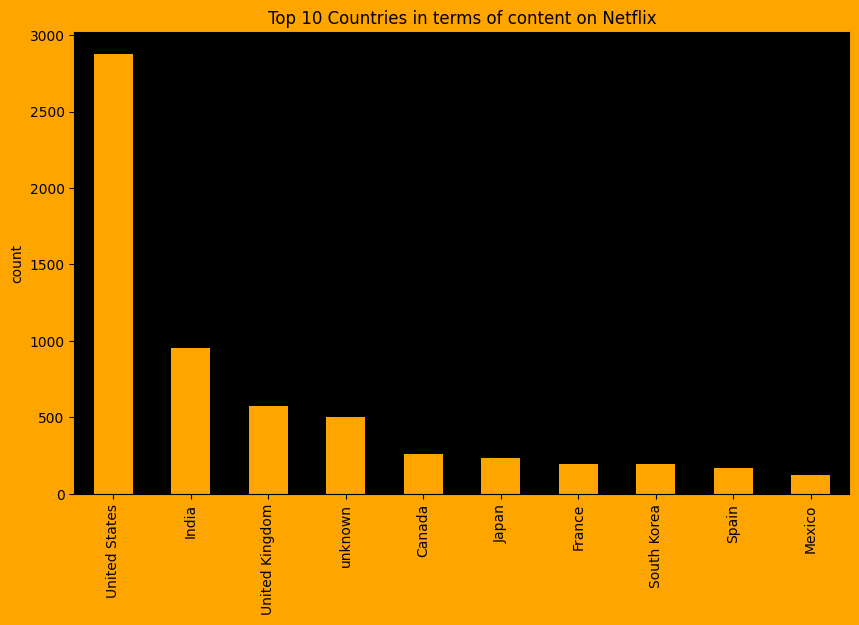

In [1637]:
# Chart - 7 visualization code
plt.figure(facecolor='#FFA500')
plt.axes().set_facecolor("black")
dataset['country'].value_counts()[:10].plot(kind='bar',color='#FFA500')
plt.title('Top 10 Countries in terms of content on Netflix')
plt.ylabel('count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 8. Country

In [1638]:
# visualization code
px.icicle(dataset,path=[px.Constant('world'),'country'],template='plotly_dark')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 9. Which Genre has the highest number of shows

In [1639]:
# Chart - 9 visualization code
px.bar(genre_df.sort_values(by='count',ascending=False)[:20],x='genre',y='count',template='plotly_dark',color_discrete_sequence=['#535724']).update_layout(title_text='Genre with most Shows',title_x=0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 10. Movies duration

In [1640]:
# visualization code
px.histogram(movies.sort_values(by='duration'),x='duration',template='plotly_dark',color_discrete_sequence=['#00FF00']).update_traces(showlegend=False).update_layout(title_text='Number of Movies for each Movie duration',title_x=0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 11. TV Shows Duration

In [1641]:
# visualization code
px.histogram(dataset[dataset['type']=='TV Show'],x='duration',color='type',template='plotly_dark',color_discrete_sequence=['#008080']).update_traces(showlegend=False).update_layout(title_text='Number of TV Shows for each TV Show duration',title_x=0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 13. Bag of words for Description column  

In [1642]:
words=''
stopwords= set(STOPWORDS)
for value in dataset['description'].values:
  value=str(value)
  tokens=value.split()
  for i in range(len(tokens)):
    tokens[i]=tokens[i].lower()
  words= words + ' '.join(tokens)+' '  

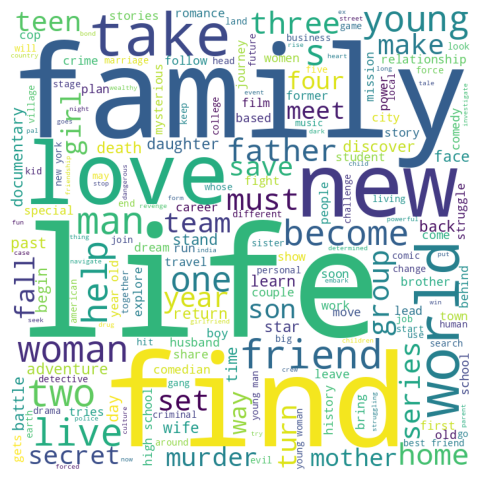

In [1643]:
# visualization code
wordcloud= WordCloud(width=700,height=700,background_color='white',stopwords=stopwords,min_font_size=10).generate(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 13. For which Age group does Netflix has the most content 

In [1644]:
# Correlation Heatmap visualization code
px.histogram(dataset,x='rating',color='type',barmode='group',template='plotly_dark',color_discrete_sequence=['#E0A96D','#00008B']).update_layout(title_text='Number of Shows for different age groups',title_x=0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 14. When were most of the Shows added

In [1645]:
# visualization code
px.histogram(dataset,x='year_added',color='type',barmode='group',template='plotly_dark',color_discrete_sequence=['#FFFF00','#013220']).update_layout(title_text='In which year were most shows added',title_x=0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15. Latest Shows

In [1646]:
# visualization code
px.pie(names=dataset['latest'].unique(),values=np.sort(dataset['latest'].value_counts()),hole=0.5,template='plotly_dark',width=650,height=350,color_discrete_sequence=['#7A2048','#1E2761']).update_traces(hovertemplate=None,textinfo='percent + value + label',showlegend=False).update_layout(title_text='Release year and Added year same for shows (1 means Yes 0 means No)',title_x=0.5)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***6. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1. All countries are contributing eqally in terms of content on NETFLIX

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [1647]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2. NETFLIX has equal number of shows for each age group.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [1648]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [1649]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***7. Feature Engineering & Data Pre-processing***

### 1. Feature Manipulation & Selection

#### 2. Feature Selection

In [1650]:
# Manipulate Features to minimize feature correlation and create new features
dataset.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,latest
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,Adults,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,1
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,Adults,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,1
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,Adults,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,Teens,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,Teens,123 min,Dramas,A brilliant group of students become card-coun...,2020,0


In [1651]:
clustering_df=dataset[['type','title','director','cast','country','rating','listed_in','description']]

In [1652]:
clustering_df.set_index('title',inplace=True)

In [1653]:
clustering_df.head()

,type,director,cast,country,rating,listed_in,description
title,,,,,,,
3%,TV Show,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,Adults,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
7:19,Movie,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,Adults,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
23:59,Movie,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,Adults,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
9,Movie,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,Teens,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
21,Movie,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,Teens,Dramas,A brilliant group of students become card-coun...


In [1654]:
clustering_df['clustering_column']=clustering_df['type']+' '+clustering_df['director']+' '+clustering_df['cast']+' '+clustering_df['country']+' '+clustering_df['rating']+' '+clustering_df['listed_in']+' '+clustering_df['description']

In [1655]:
clustering_df.drop([col for col in clustering_df.columns if col not in 'clustering_column'],axis=1,inplace=True)

In [1656]:
clustering_df

,clustering_column
title,
3%,"TV Show unknown João Miguel, Bianca Comparato,..."
7:19,"Movie Jorge Michel Grau Demián Bichir, Héctor ..."
23:59,"Movie Gilbert Chan Tedd Chan, Stella Chung, He..."
9,"Movie Shane Acker Elijah Wood, John C. Reilly,..."
21,"Movie Robert Luketic Jim Sturgess, Kevin Space..."
...,...
Zozo,"Movie Josef Fares Imad Creidi, Antoinette Turk..."
Zubaan,"Movie Mozez Singh Vicky Kaushal, Sarah-Jane Di..."
Zulu Man in Japan,Movie unknown Nasty C unknown Adults Documenta...


In [1657]:
clustering_df['clustering_column'][0]

'TV Show unknown João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi Brazil Adults International TV Shows, TV Dramas, TV Sci-Fi & Fantasy In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

##### Which all features you found important and why?

Answer Here.

### 2. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Lower Casing

In [1658]:
# Lower Casing
clustering_df['clustering_column']=clustering_df['clustering_column'].str.lower()

In [1659]:
clustering_df['clustering_column'][0]

'tv show unknown joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi brazil adults international tv shows, tv dramas, tv sci-fi & fantasy in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

#### 2. Expand Contraction

In [1660]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1661]:
import contractions
def expansion_function(string):
  expanded=[]
  for word in string.split():
    expanded.append(contractions.fix(word))
  expanded=' '.join(expanded)
  return expanded

In [1662]:
# Expand Contraction
clustering_df['clustering_column']=clustering_df['clustering_column'].apply(expansion_function)

In [1663]:
clustering_df['clustering_column'][0]

'tv show unknown joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschi brazil adults international tv shows, tv dramas, tv sci-fi & fantasy in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

#### 3. Removing Punctuations

In [1664]:
# Remove Punctuations
def remove_punctuations(string):
  final=''
  for char in string:
    if char not in [',','.',"'",'"','?','!',';','%','(',')','&','-','1','2','3','4','5','6','7','8','9','0','_']:
      final+=char
  return final    

In [1665]:
clustering_df['clustering_column']=clustering_df['clustering_column'].apply(remove_punctuations)

In [1666]:
clustering_df['clustering_column'][0]

'tv show unknown joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil adults international tv shows tv dramas tv scifi  fantasy in a future where the elite inhabit an island paradise far from the crowded slums you get one chance to join the  saved from squalor'

#### 5. Removing Stopwords

In [1667]:
def remove_stopwords(string):
  final=[]
  stopwords=set(STOPWORDS)
  for word in string.split():
    if word not in stopwords:
      final.append(word)
  final= ' '.join(final)
  return final    

In [1668]:
clustering_df['clustering_column']=clustering_df['clustering_column'].apply(remove_stopwords)

In [1669]:
clustering_df['clustering_column'][0]

'tv show unknown joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschi brazil adults international tv shows tv dramas tv scifi fantasy future elite inhabit island paradise far crowded slums one chance join saved squalor'

#### 8. Lemmatization and Tokenization

In [1670]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [1671]:
def lemmatization_tokenization(string):
  lemmatizer=WordNetLemmatizer()
  tokens=nltk.word_tokenize(string)
  lemmatized_tokens=[lemmatizer.lemmatize(token) for token in tokens]
  return lemmatized_tokens

In [1672]:
clustering_df['clustering_column']=clustering_df['clustering_column'].apply(lemmatization_tokenization)

In [1675]:
print(clustering_df['clustering_column'][0])

['tv', 'show', 'unknown', 'joão', 'miguel', 'bianca', 'comparato', 'michel', 'gomes', 'rodolfo', 'valente', 'vaneza', 'oliveira', 'rafael', 'lozano', 'viviane', 'porto', 'mel', 'fronckowiak', 'sergio', 'mamberti', 'zezé', 'motta', 'celso', 'frateschi', 'brazil', 'adult', 'international', 'tv', 'show', 'tv', 'drama', 'tv', 'scifi', 'fantasy', 'future', 'elite', 'inhabit', 'island', 'paradise', 'far', 'crowded', 'slum', 'one', 'chance', 'join', 'saved', 'squalor']


##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 3. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 4. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

## ***8. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***